In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y69K4HR1sTWT9GUq1Dk1")
project = rf.workspace("project-r2a3i").project("eg-currency-fcuw3")
version = project.version(1)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 986.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to eg-currency-1 in yolov8:: 100%|██████████| 13732/13732 [00:02<00:00, 4600.71it/s]


In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.47  Python-3.9.13 torch-2.2.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Setup complete  (8 CPUs, 7.8 GB RAM, 393.3/465.8 GB disk)


In [2]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task= detect mode= train data=/content/eg-currency-1/data.yaml model=yolov8n.pt epochs=10 imgsz=640 batch=16

100% 6.23M/6.23M [00:00<00:00, 82.2MB/s]
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/eg-currency-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

In [3]:
from IPython.display import Image, display

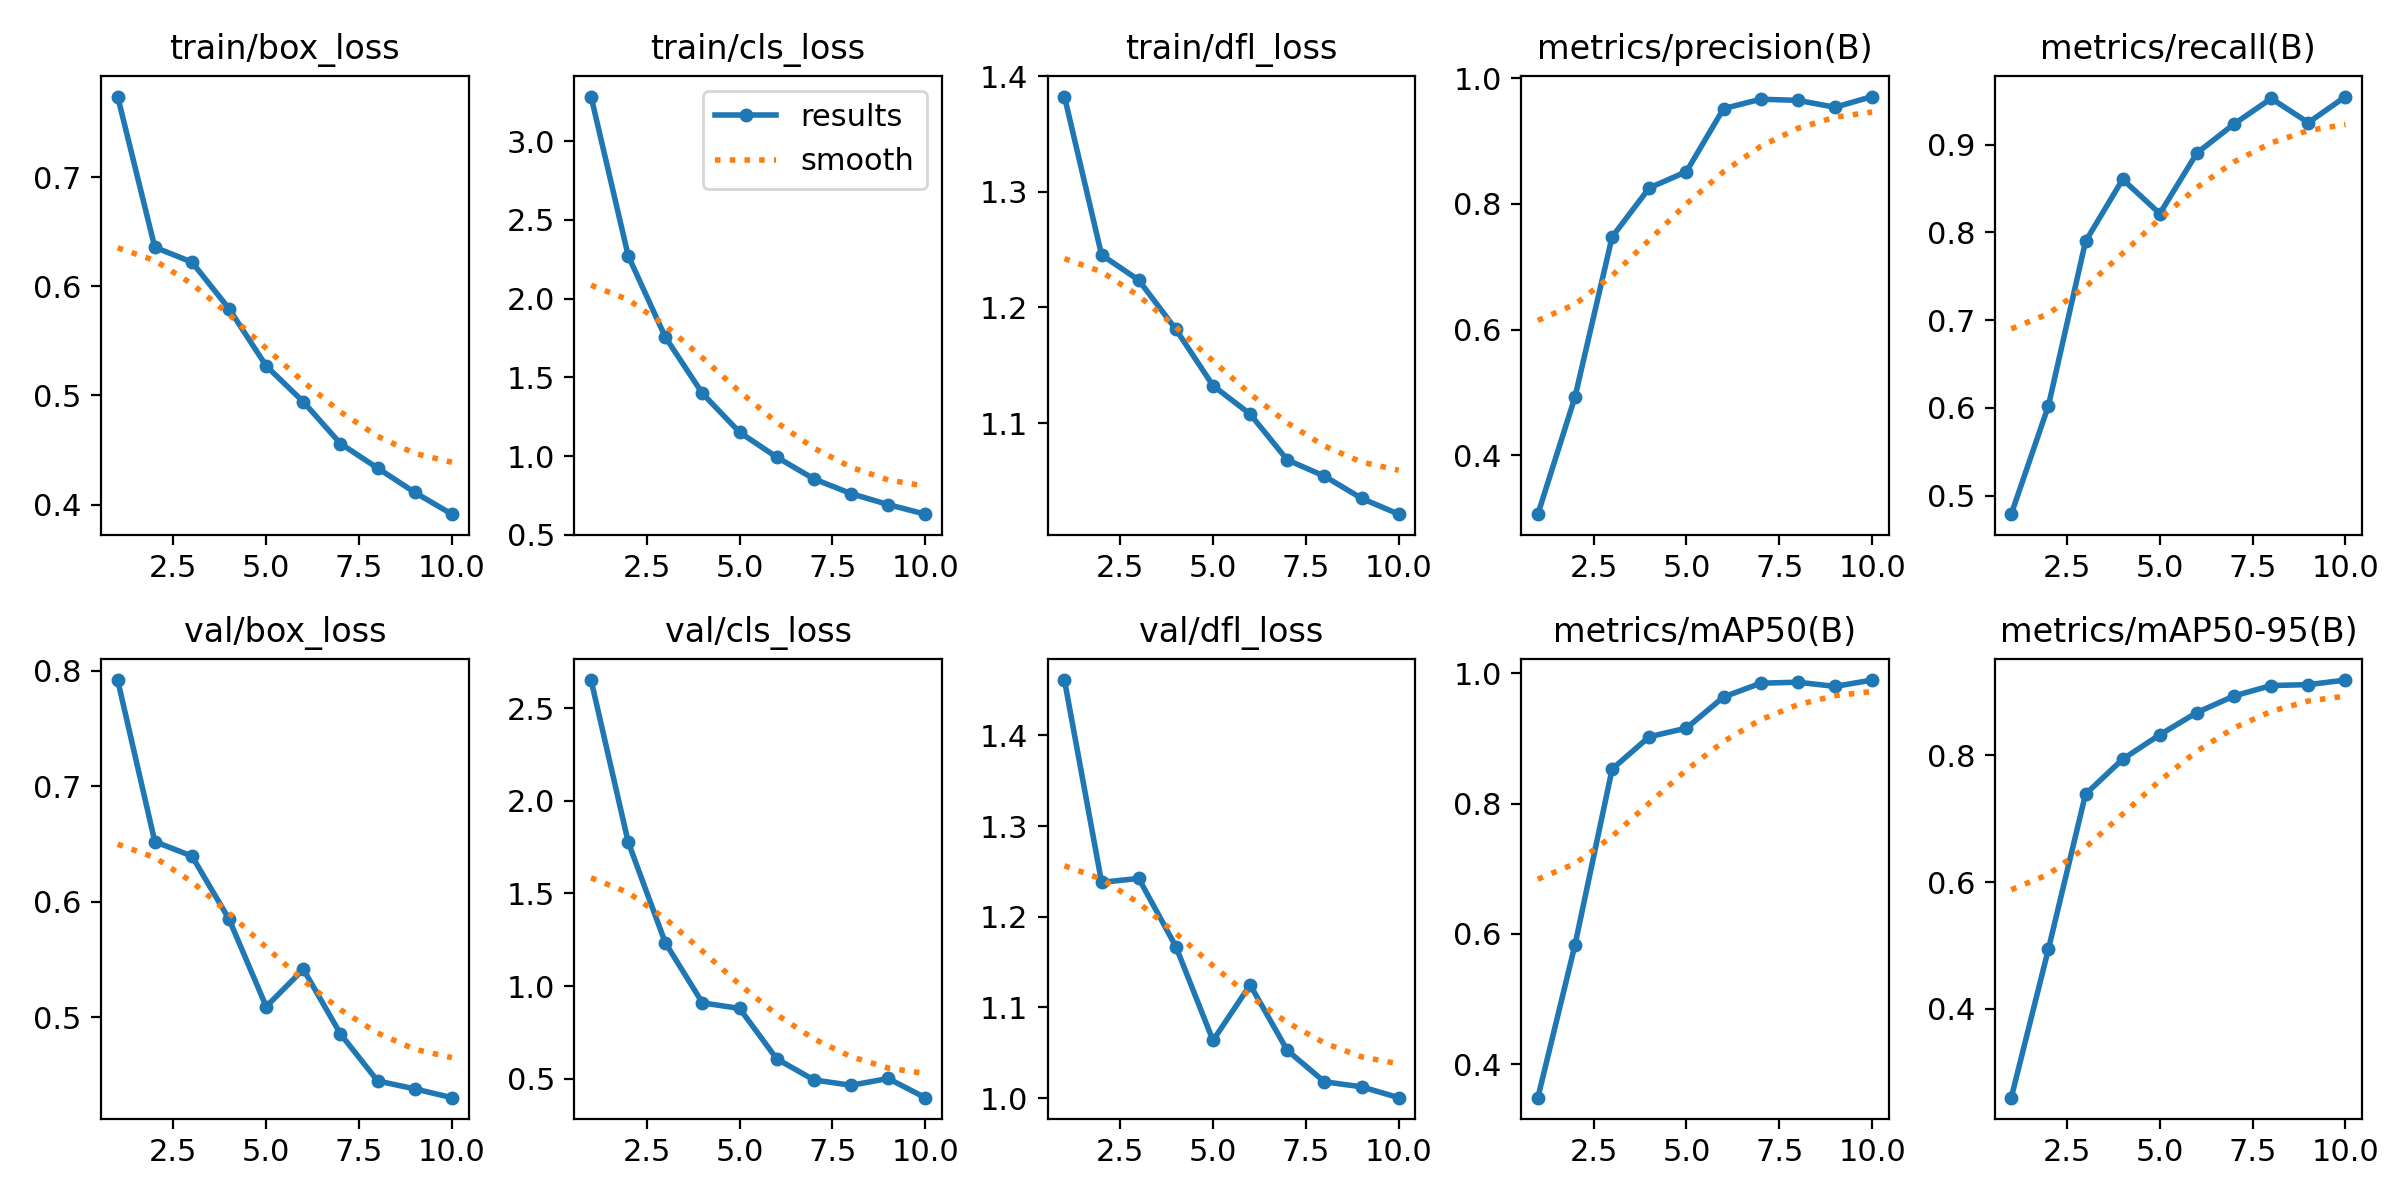

In [5]:
display(Image(filename=f"/content/runs/detect/train/results.png", width=1000))

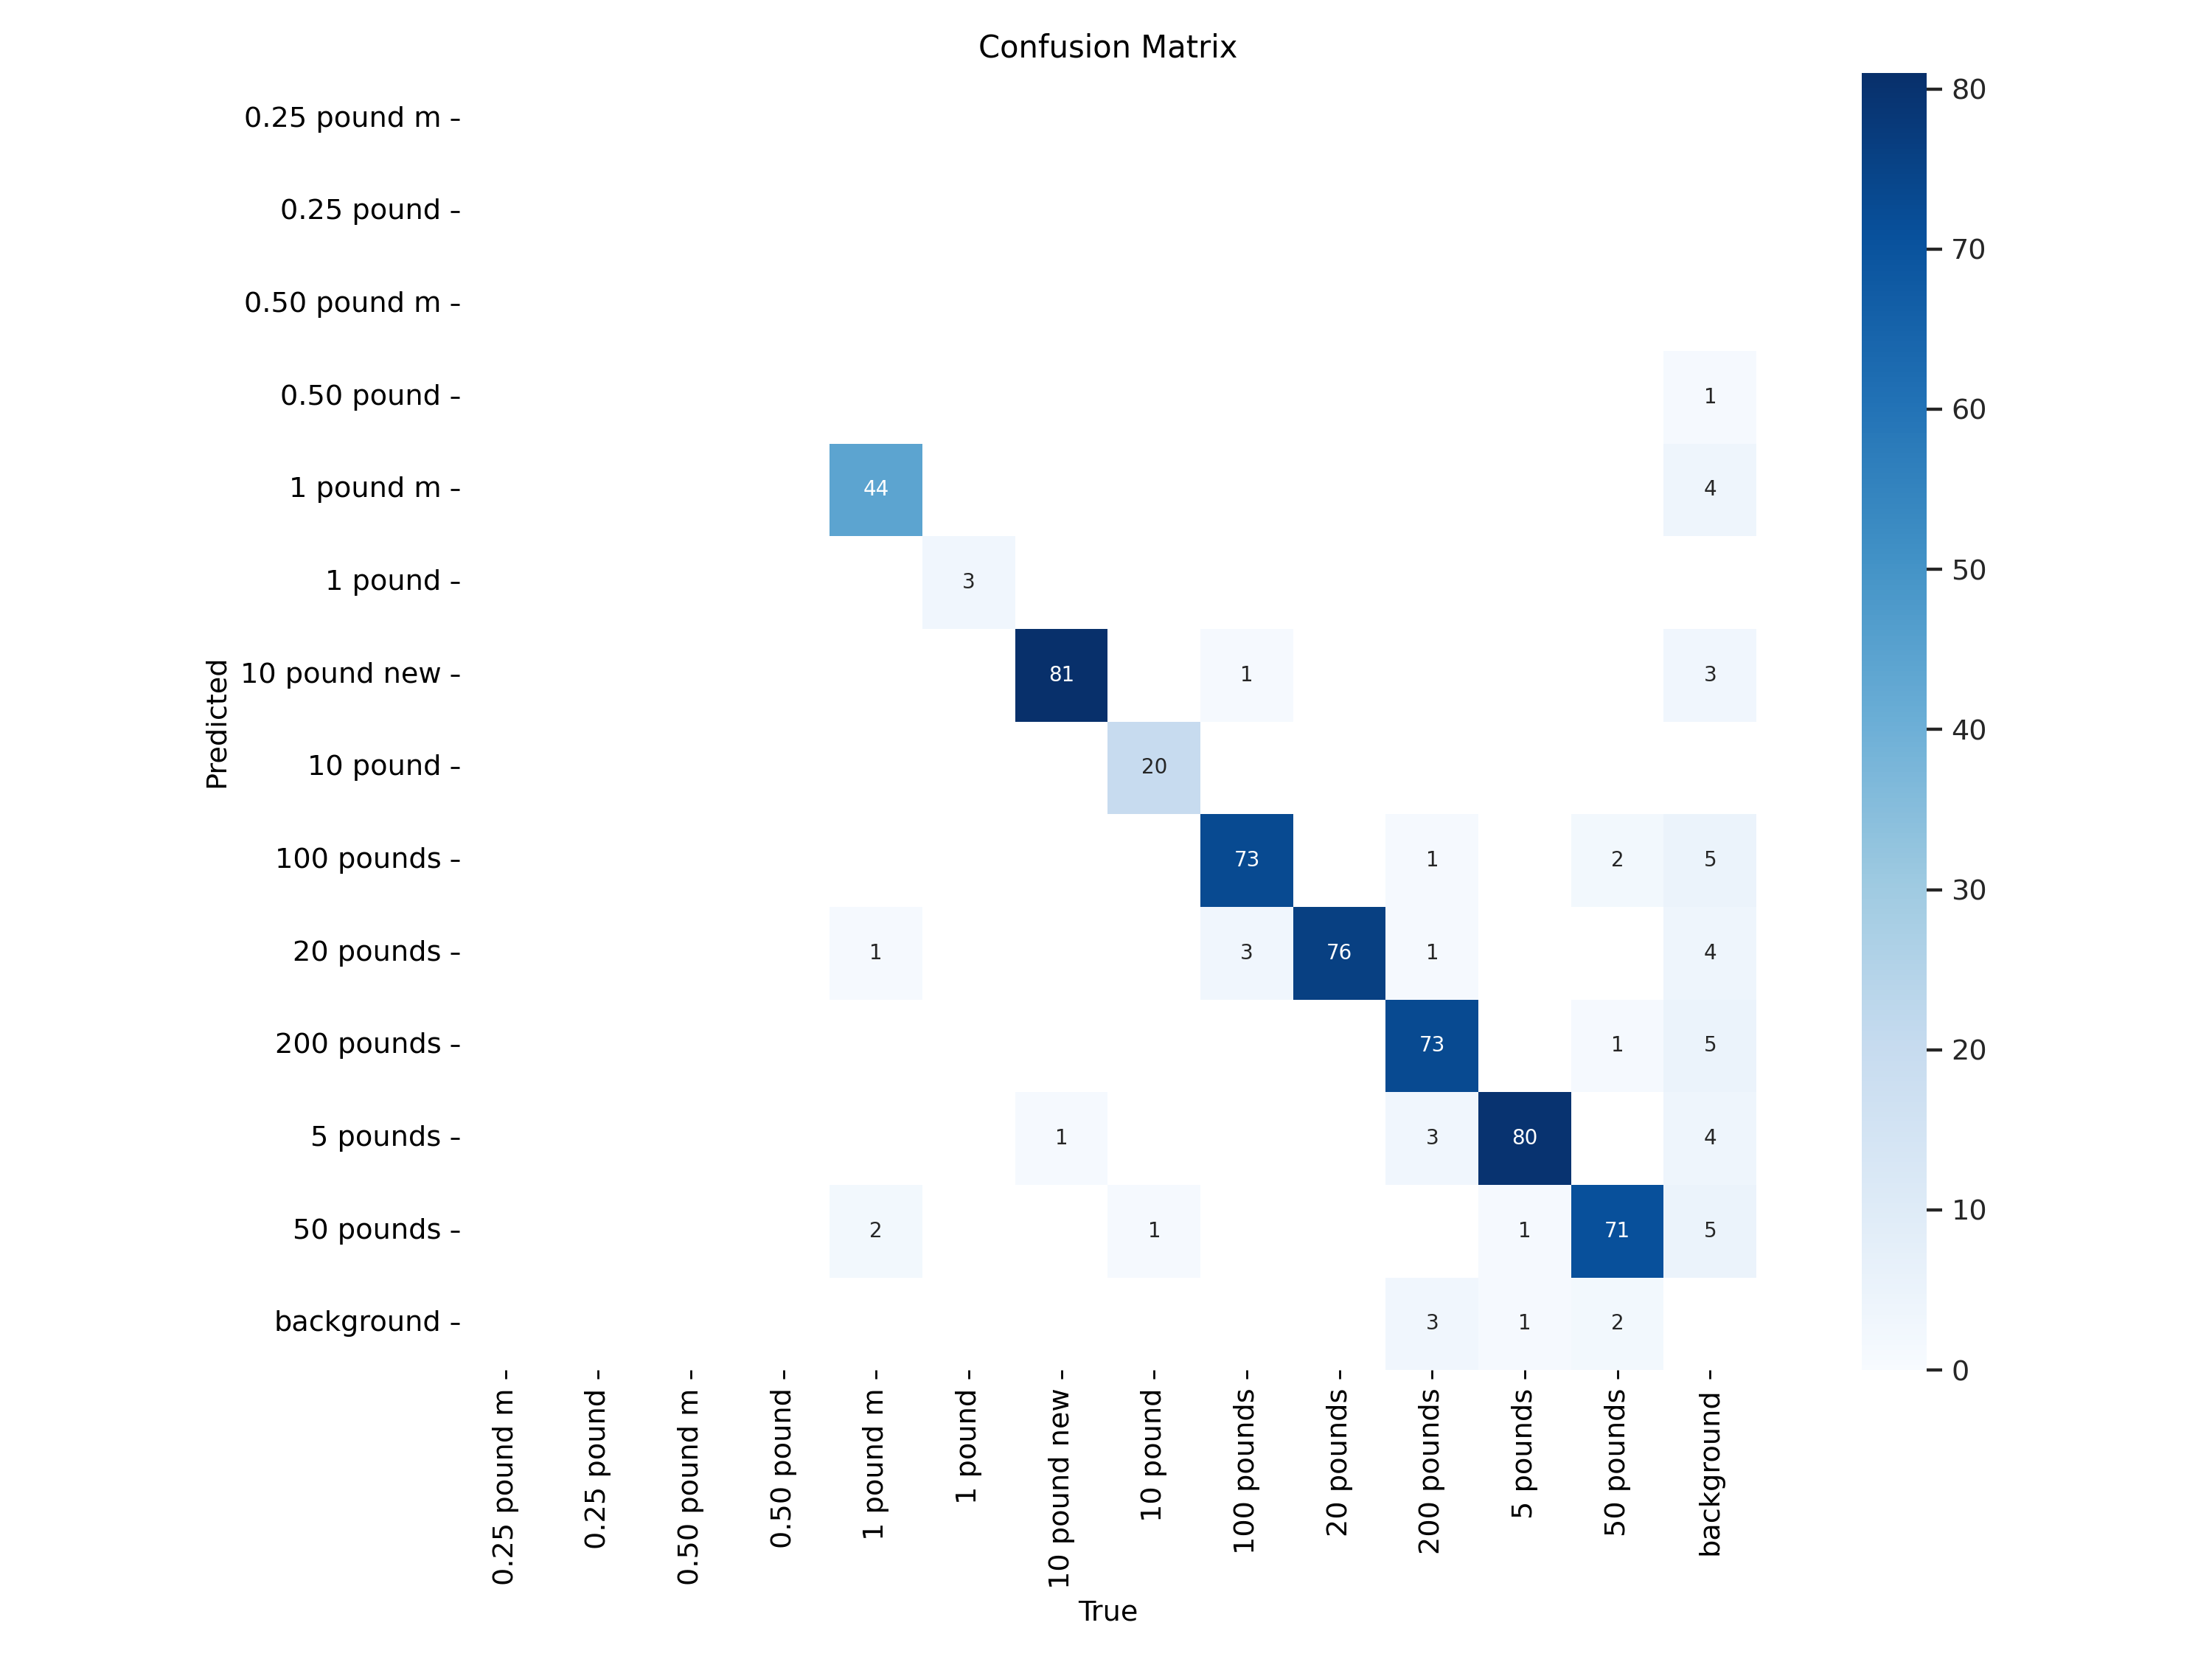

In [6]:
display(Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000))

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/content/eg-currency-1/test/images

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs

image 1/274 /content/eg-currency-1/test/images/-trashed-1672168926-IMG20221127212023_jpg.rf.b7d3a802231b1d410f17e493c7a30638.jpg: 640x640 1 10 pound new, 83.7ms
image 2/274 /content/eg-currency-1/test/images/0472e230-140a-40b6-b961-9be760486317_jpg.rf.c5fad447478c94099195517714c16dae.jpg: 640x640 1 100 pounds, 53.1ms
image 3/274 /content/eg-currency-1/test/images/1888a60c-66c5-4bd5-b03c-80d0d8bcfe26_jpg.rf.26cb15ed90425d1d1bb937734f5bc5c6.jpg: 640x640 1 50 pounds, 48.6ms
image 4/274 /content/eg-currency-1/test/images/20-egyptian-pounds-old-banknote-denominations-of-twenty-egp-symbol-HGPG64_jpg.rf.219a1a9d3d9a237e6e9affae2a9ddd21.jpg: 640x640 1 20 pounds, 39.7ms
image 5/274 /content/eg-currency-1/test/images/20-pounds-banknote-mohammed-ali-mosque-and-egypt-2001-eh3bkd_jpg.rf.581361b6d9fc8338e47594e5a9da48f1.jpg: 640x640 1 20 pou

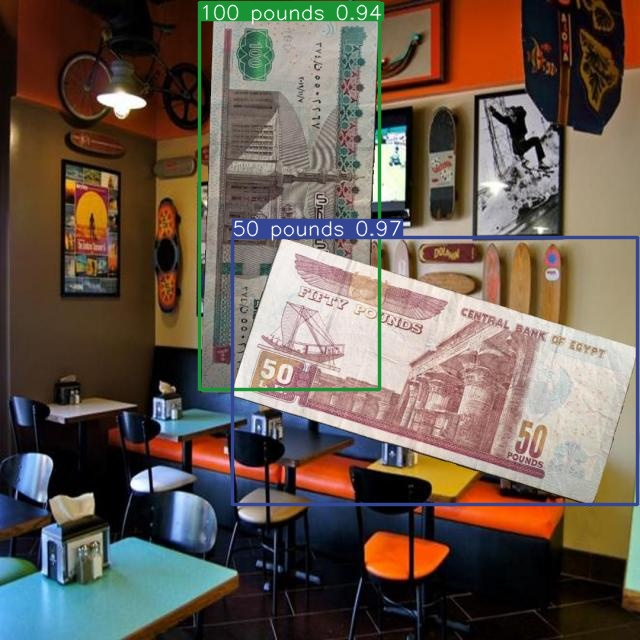

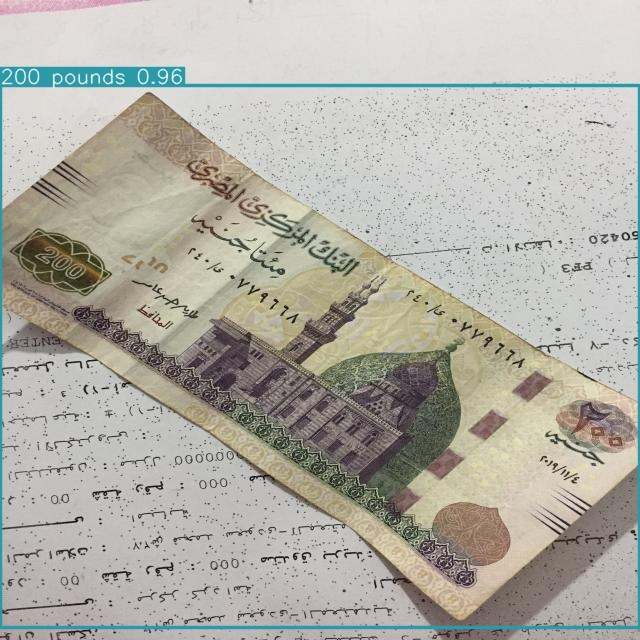

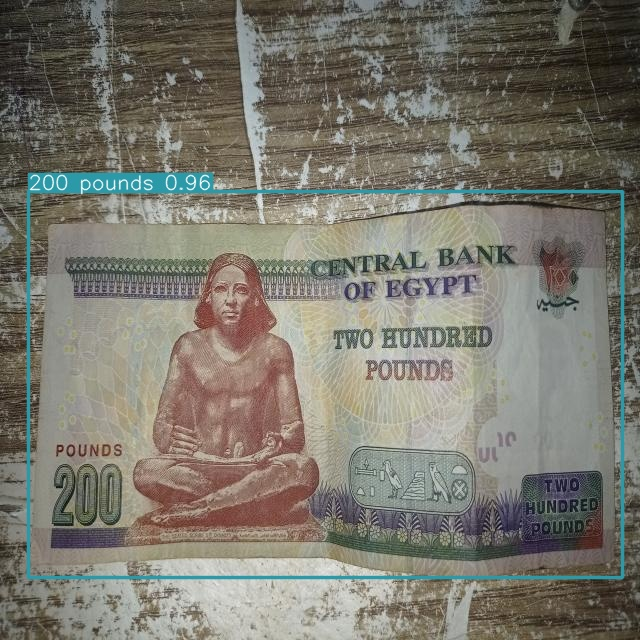

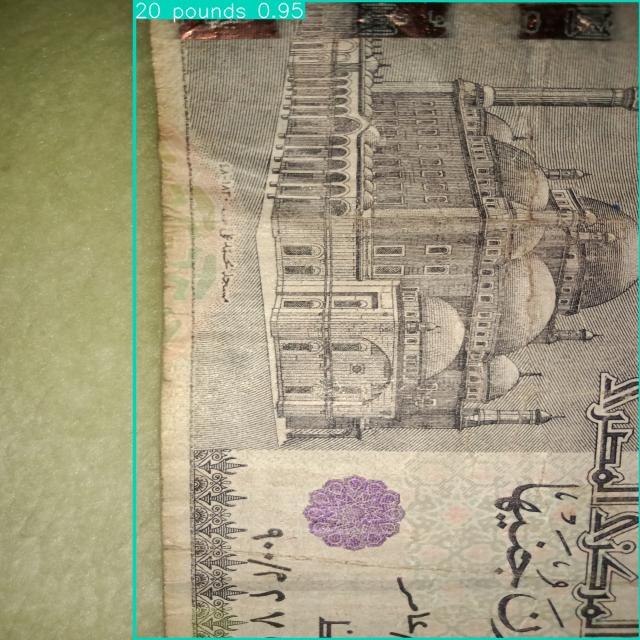

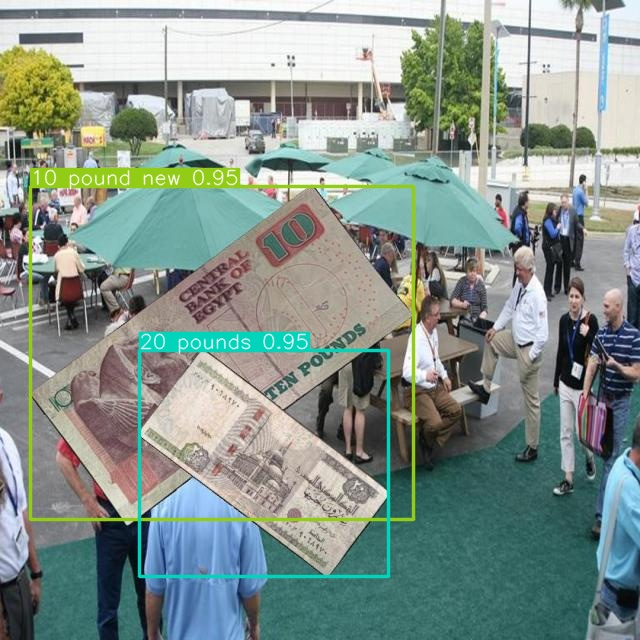

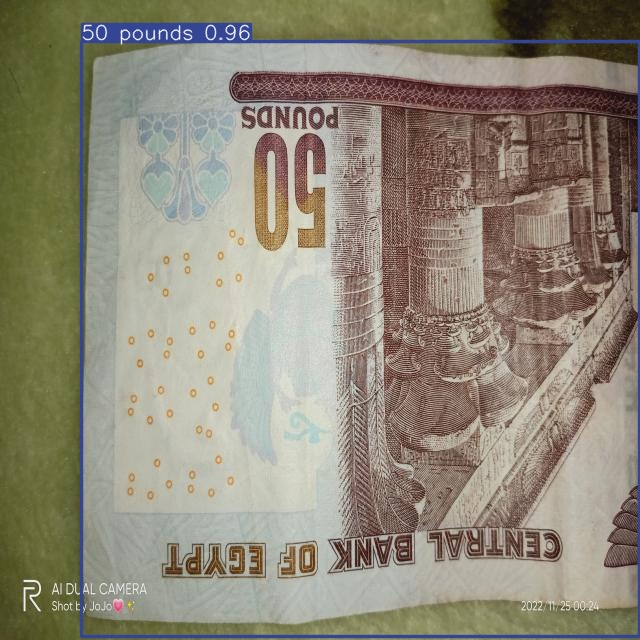

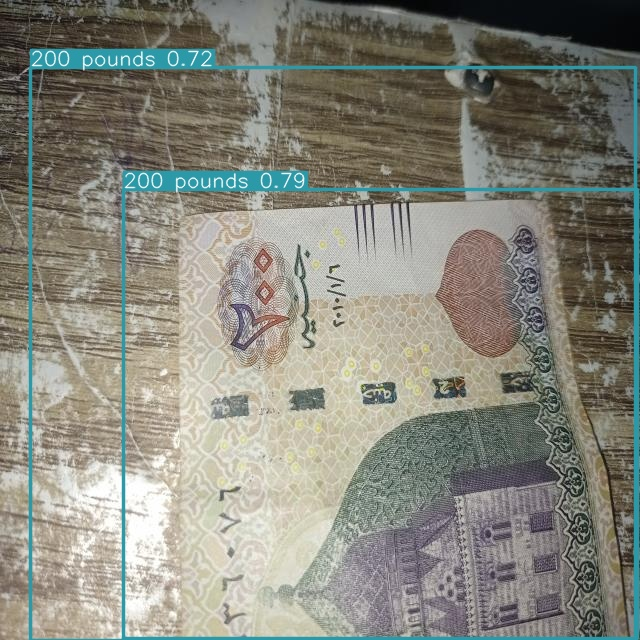

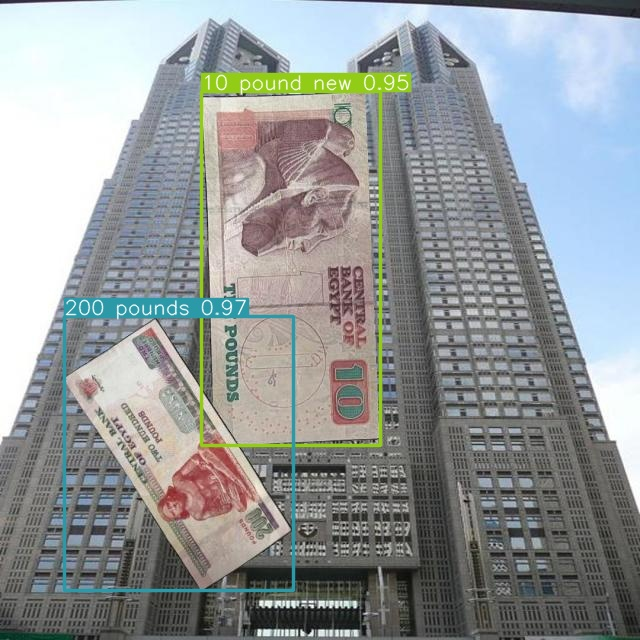

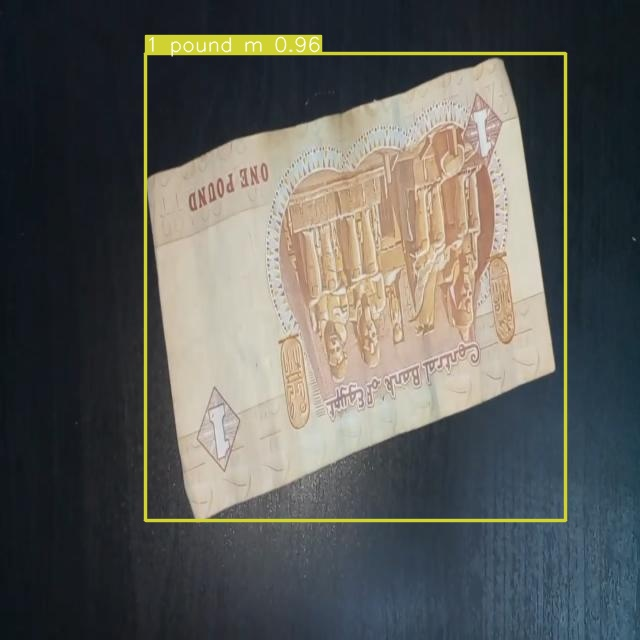

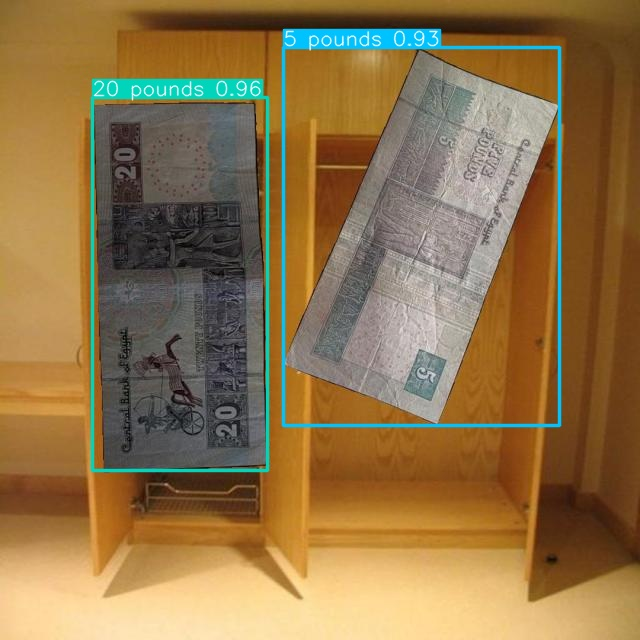

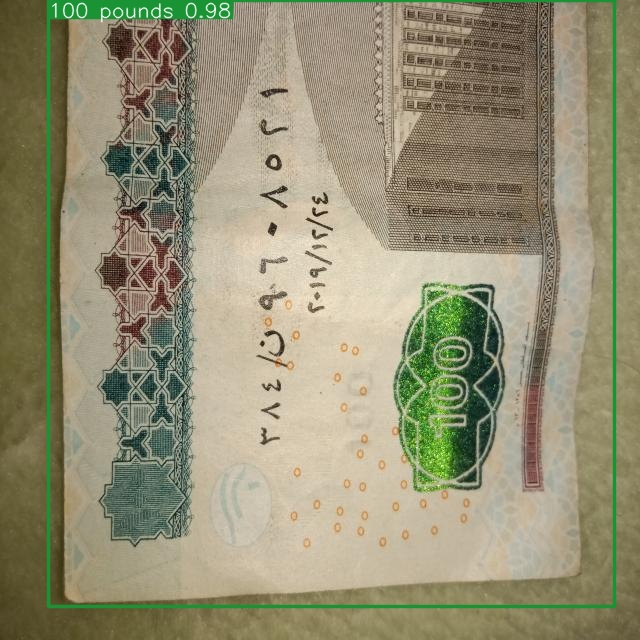

In [8]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1



In [7]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('YoloV8Model.pt')

# Open the video file
cap = cv2.VideoCapture(0)
names = model.model.names

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    # frame=cv2.resize(frame, dsize=(640,480))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if success:
        # Run YOLOv8  on the frame
        results = model(frame)
        
        for result in results[0].boxes.cpu().numpy():
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cls = names[int(result.cls[0])]
            conf = result.conf[0].round(2)
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255,0,0), 2)
            
            cv2.putText(frame, cls, (x1,y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=3, color=(255,0,0))
            
            cv2.putText(frame, str(conf), (x2,y2), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1, color=(255,0,0))
        # Visualize the results on the frame
        #annotated_frame = results[0].plot()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Display the annotated frame
        cv2.imshow("Egypt Money", cv2.flip(frame, 1))

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 106.6ms
Speed: 15.0ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 167.6ms
Speed: 1.0ms preprocess, 167.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 130.5ms
Speed: 2.4ms preprocess, 130.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 137.2ms
Speed: 1.0ms preprocess, 137.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 125.1ms
Speed: 3.0ms preprocess, 125.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 149.3ms
Speed: 4.9ms preprocess, 149.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 161.4ms
Speed: 0.4ms preprocess, 161.4ms inference, 7.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 163.1ms
Speed: 0.0ms prep

In [1]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('YoloV8Model.pt')

# Open the video file
cap = cv2.VideoCapture(0)
names = model.model.names

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        # Flip the frame horizontally
        frame_flipped = cv2.flip(frame, 1)

        # Run YOLOv8 on the flipped frame
        results = model(frame_flipped)

        for result in results[0].boxes.cpu().numpy():
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cls = names[int(result.cls[0])]
            conf = result.conf[0].round(2)

            # Adjust text position for the flipped image
            text_pos = (frame_flipped.shape[1] - x2, y1)
            conf_pos = (frame_flipped.shape[1] - x1, y2)

            cv2.rectangle(frame_flipped, (x1, y1), (x2, y2), (0,0,255), 2)

            # Visualize the results on the flipped frame
            cv2.putText(frame_flipped, cls, text_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=3, color=(0,0,255))
            cv2.putText(frame_flipped, str(conf), conf_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1, color=(0,0,255))

        # Display the annotated flipped frame
        cv2.imshow("Egypt Money", frame_flipped)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 1216.7ms
Speed: 146.2ms preprocess, 1216.7ms inference, 16224.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 124.6ms
Speed: 2.6ms preprocess, 124.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 10 pound new, 106.0ms
Speed: 15.4ms preprocess, 106.0ms inference, 58.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 10 pound new, 118.0ms
Speed: 4.6ms preprocess, 118.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 142.4ms
Speed: 0.0ms preprocess, 142.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.6ms
Speed: 0.6ms preprocess, 131.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 121.7ms
Speed: 0.7ms preprocess, 121.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 123.4ms
Speed: 0.0